# Word Embeddings notícias de 2018

Os dados são notícias de 2018, coletadas dos principais jornais do Brasil:
* `Carta Capital`, 
* `Estadao`, 
* `Folha de São Paulo`, 
* `O Antagonista`, 
* `O Globo`, 
* `Veja`

Uma análise detalhada dos dados está disponível [aqui](https://pages.github.com/). Objetivo deste notebook é utilizar o modelo word2vec para gerar embeddings a partir dos textos dessas notícias. A arquitetura utilizada pelo modelo é a skip-gram, cada palavra é representada por um vetor de 300 dimensões.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# load data
news = pd.read_csv("data/news_bias.csv") 

In [3]:
def processSection(section):
    section = str(section).lower()
    if 'pol' in section or 'poder' in section:
        return 'politica'
    elif 'opini' in section or 'felipe' in section or 'colunas' in section or 'renan' in section or 'mario' in section or 'claudio' in section:
        return 'opiniao'
    elif 'esport' in section or 'copa' in section:
        return 'esporte'
    elif 'mundo' in section or 'intern' in section:
        return 'internacional'
    elif 'econ' in section or 'merca' in section:
        return 'economia'
    elif 'ci' in section or 'tec' in section:
        return 'tecnologia'
    elif 'edu' in section or 'merca' in section:
        return 'educacao'
    else:
        return 'diversos'

In [4]:
news['section'] = news['section'].apply(processSection)

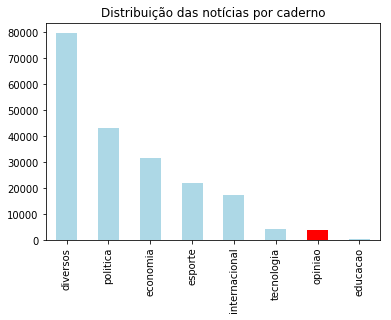

In [5]:
a = news['section'].value_counts().plot.bar(title = "Distribuição das notícias por caderno",legend=False, color=["lightblue", "lightblue", "lightblue", "lightblue","lightblue","lightblue","red","lightblue"])

In [6]:
opiniao = news[news['val'] >= 0][news['section'] == 'opiniao']

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


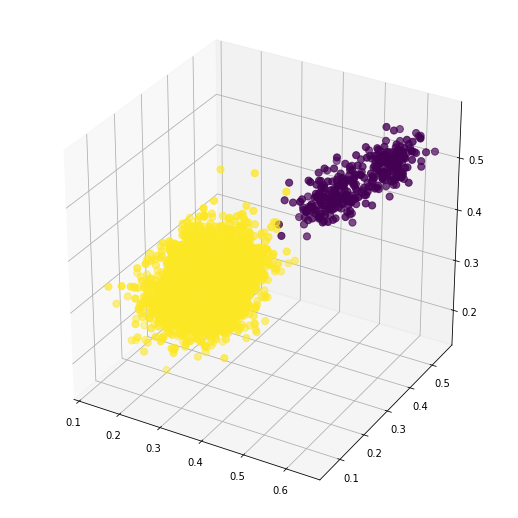

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(opiniao[['arg','val', 'sen','mod','pre']])
y_kmeans = kmeans.predict(opiniao[['arg','val', 'sen','mod','pre']])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(opiniao['arg'], opiniao['val'], opiniao['sen'], c=y_kmeans, s=50, cmap='viridis')

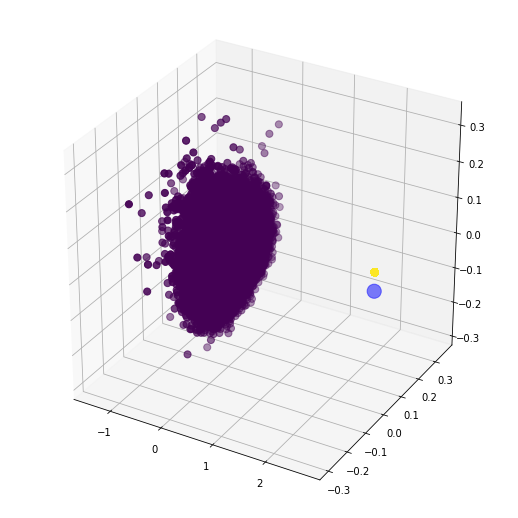

In [8]:
from sklearn.preprocessing import StandardScaler
opiniao['arg'] = StandardScaler().fit_transform(opiniao[['arg']])
opiniao['val'] = StandardScaler().fit_transform(opiniao[['val']])
opiniao['sen'] = StandardScaler().fit_transform(opiniao[['sen']])
opiniao['mod'] = StandardScaler().fit_transform(opiniao[['mod']])
opiniao['pre'] = StandardScaler().fit_transform(opiniao[['pre']])

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(news[['arg','val', 'sen','mod','pre']])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(principalComponents)
y_kmeans = kmeans.predict(principalComponents)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

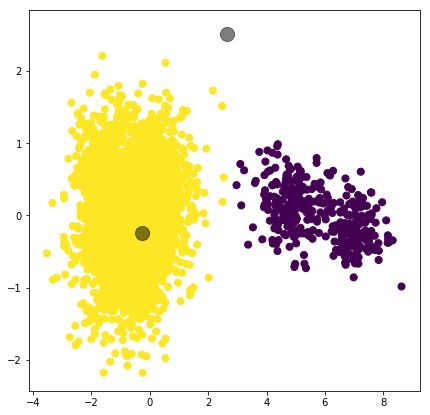

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(opiniao[['arg','val', 'sen','mod','pre']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
X = opiniao[['arg','val', 'sen','mod','pre']]
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
plt.figure()

pd.plotting.parallel_coordinates(
    news[['arg','val', 'sen','mod','pre', 'section']], 'section')

plt.show()